# Ch01. Characteristics of Time Series

* Time Series Analysis and its Applications With R Examples (3rd Edition) 
* 김무성

# Contents

* 1.1 Introduction
* 1.2 The Nature of Time Series Data
* 1.3 Time Series Statistical Models
* 1.4 Measures of Dependence: Autocorrelation and Cross-Correlation
* 1.5 Stationary Time Series
* 1.6 Estimation of Correlation

# 1.1 Introduction

* Before looking more closely at the particular statistical methods, it is appropriate to mention that two separate, but not necessarily mutually exclusive, approaches to time series analysis exist, commonly identified as the time domain approach (Chapter 3) and the frequency domain approach (Chapter 4).

# 1.2 The Nature of Time Series Data

## Example 1.1 Johnson & Johnson Quarterly Earnings

* There are 84 quarters (21 years) measured from the first quarter of 1960 to the last quarter of 1980. 
* Modeling such series begins by observing the primary patterns in the time history.  
    - trend and variability, 
    - regular oscillation
* Methods for analyzing data such as these are explored in Chapter 2 (see Problem 2.1) using regression techniques.

In [3]:
require(astsa)

In [15]:
str(jj)

 Time-Series [1:84] from 1960 to 1981: 0.71 0.63 0.85 0.44 0.61 0.69 0.92 0.55 0.72 0.77 ...


In [16]:
head(jj)

[1] 0.71 0.63 0.85 0.44 0.61 0.69

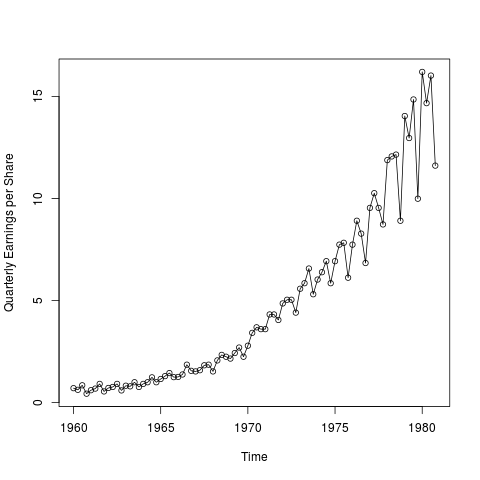

In [16]:
plot(jj, type="o", ylab="Quarterly Earnings per Share")

## Example 1.2 Global Warming

* The global temperature series record.
* The data are the global mean land–ocean temperature index from 1880 to 2009, with the base period 1951-1980. 
    - the data are deviations, 
    - measured in degrees centigrade, from the 1951-1980 average, 
    - sharp upward trend at about 1970. 
* The question of interest for global warming proponents and opponents is
    - whether the overall trend is natural 
    - or whether it is caused by some human-induced interface.
* percentage changes in temperature
* the question of trend is of more interest than particular periodicities.

In [12]:
str(gtemp)

 Time-Series [1:130] from 1880 to 2009: -0.28 -0.21 -0.26 -0.27 -0.32 -0.32 -0.29 -0.36 -0.27 -0.17 ...


In [13]:
head(gtemp)

[1] -0.28 -0.21 -0.26 -0.27 -0.32 -0.32

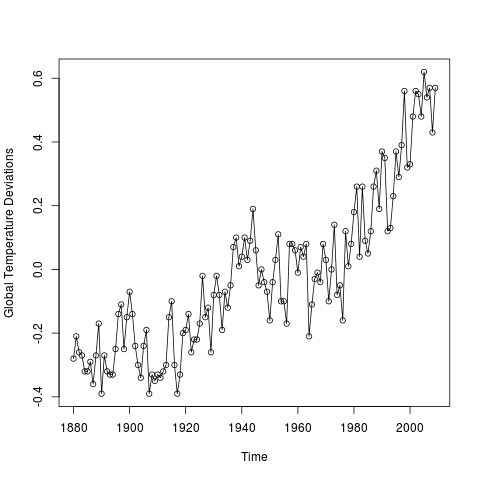

In [17]:
plot(gtemp, type="o", ylab="Global Temperature Deviations")

## Example 1.3 Speech Data

* Figure 1.3 shows a small .1 second (1000 point) sample of recorded speech
for the phrase aaa · · · hhh, and we note the repetitive nature of the signal
and the rather regular periodicities. 
* One current problem of great interest is computer recognition of speech, which would require converting this particular signal into the recorded phrase aaa · · · hhh. 
* Spectral analysis can be used in this context to produce a signature of this phrase that can be compared with signatures of various library syllables to look for a match.
* One can immediately notice the rather regular repetition of small wavelets.
* The separation between the packets is known as the pitch period and rep-
resents the response of the vocal tract filter to a periodic sequence of pulses
stimulated by the opening and closing of the glottis.

In [9]:
str(speech)

 Time-Series [1:1020] from 1 to 1020: 1814 1556 1442 1416 1352 ...


In [4]:
head(speech)

[1] 1814 1556 1442 1416 1352 1154

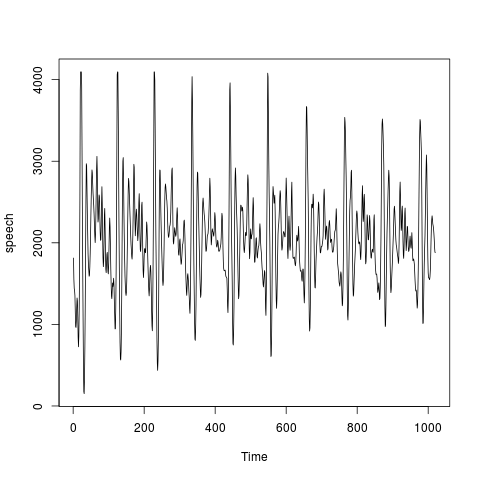

In [18]:
plot(speech)

## Example 1.4 New York Stock Exchange

* financial time series data
* the daily returns (or percent change) of the New York Stock Exchange (NYSE)
* It is easy to spot the crash of October 19, 1987 in the figure. 
* The data shown in Figure 1.4 are typical of return data. The mean of the series appears to be stable with an average
* return of approximately zero, however, the volatility (or variability) of data
changes over time.
*  volatility clustering
    - highly volatile periods tend to be clustered together. 
    - A problem in the analysis of these type of financial data is to forecast the volatility of future returns.
* models 
    - ARCH 
    - GARCH models (Engle, 1982; Bollerslev, 1986)
    - stochastic volatility models 

In [10]:
str(nyse)

 Time-Series [1:2000] from 1 to 2000: 0.00335 -0.01418 -0.01673 0.00229 -0.01692 ...


In [11]:
head(nyse)

[1]  0.003348537 -0.014175490 -0.016727090  0.002293640 -0.016920980
[6] -0.004493365

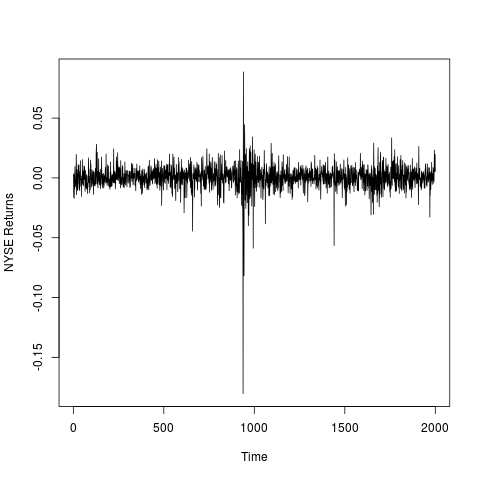

In [19]:
plot(nyse, ylab="NYSE Returns")

## Example 1.5 El Ni ̃ o and Fish Population

* We may also be interested in analyzing several time series at once. 
* Figure 1.5 shows monthly values of an environmental series called the Southern Oscillation Index (SOI) and associated Recruitment (number of new fish) furnished by Dr. Roy Mendelssohn of the Pacific Environmental Fisheries
Group (personal communication). 
    - SOI - http://www.ncdc.noaa.gov/teleconnections/enso/indicators/soi/The
    - SOI measures changes in air pressure, related to sea surface temperatures in the central Pacific Ocean. 
    - The Recruitment series also shows several kinds of oscillations, a faster frequency that seems to repeat about every 12 months and a slower frequency that seems to repeat about every 50 months. 
* The study of the kinds of cycles and their strengths is the subject of Chapter 4. 
* The two series also tend to be somewhat related; 
    - it is easy to imagine that somehow the fish population is dependent on the SOI. 
    - Perhaps even a lagged relation exists, with the SOI signaling changes in the fish population. 
    - This possibility suggests trying some version of regression analysis as a procedure for relating the two series. 
* regression analysis
* Transfer function modeling

In [7]:
str(soi)

 Time-Series [1:453] from 1950 to 1988: 0.377 0.246 0.311 0.104 -0.016 0.235 0.137 0.191 -0.016 0.29 ...


In [5]:
head(soi)

[1]  0.377  0.246  0.311  0.104 -0.016  0.235

In [8]:
str(rec)

 Time-Series [1:453] from 1950 to 1988: 68.6 68.6 68.6 68.6 68.6 ...


In [6]:
head(rec)

[1] 68.63 68.63 68.63 68.63 68.63 68.63

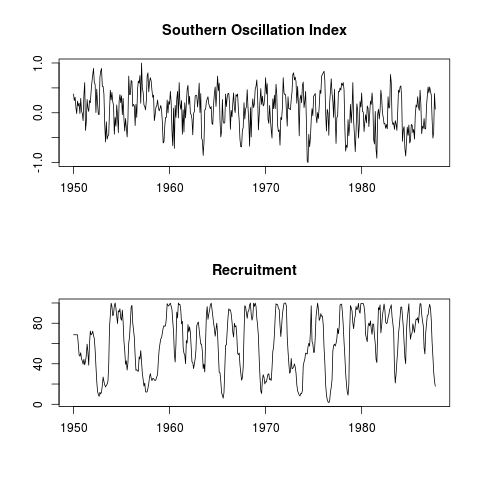

In [20]:
par(mfrow = c(2,1)) # set up the graphics
plot(soi, ylab="", xlab="", main="Southern Oscillation Index")
plot(rec, ylab="", xlab="", main="Recruitment")

## Example 1.6 fMRI Imaging

* A fundamental problem in classical statistics occurs when we are given a
collection of independent series or vectors of series, generated under varying
experimental conditions or treatment configurations. 
* Such a set of series is
shown in Figure 1.6, where we observe data collected from various locations
in the brain via functional magnetic resonance imaging (fMRI). 
    - ample, five subjects were given periodic brushing on the hand. 
    - The stimulus was applied for 32 seconds and then stopped for 32 seconds; thus, the signal period is 64 seconds. 
    - The sampling rate was one observation every 2 seconds for 256 seconds (n = 128). 
    - For this example, we averaged the results over subjects (these were evoked responses, and all subjects were in phase). 
* The series shown in Figure 1.6 are consecutive measures of blood oxygenation-level dependent (bold) signal intensity, which measures areas of activation
* in the brain. Notice that the periodicities appear strongly in the motor cortex series and less strongly in the thalamus and cerebellum. 
* The fact that one has series from different areas of the brain suggests testing whether the areas are responding differently to the brush stimulus.    

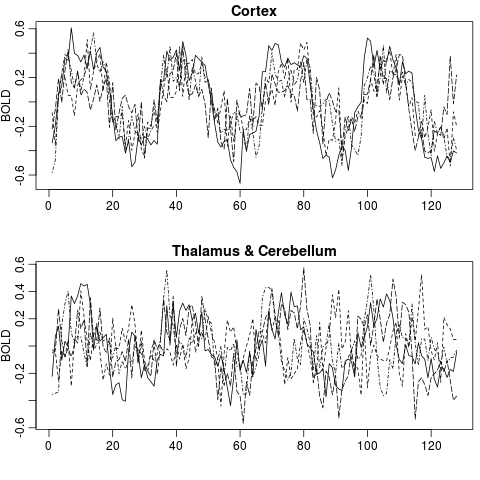

In [21]:
par(mfrow=c(2,1), mar=c(3,2,1,0)+.5, mgp=c(1.6,.6,0))
ts.plot(fmri1[,2:5], lty=c(1,2,4,5), ylab="BOLD", xlab="", main="Cortex")
ts.plot(fmri1[,6:9], lty=c(1,2,4,5), ylab="BOLD", xlab="", main="Thalamus & Cerebellum")
#mtext("Time (1 pt = 2 sec)", line=2)

## Example 1.7 Earthquakes and Explosions

* As a final example, the series in Figure 1.7 represent two phases or arrivals
along the surface, denoted by P (t = 1, . . . , 1024) and S (t = 1025, . . . , 2048),
* at a seismic recording station. The recording instruments in Scandinavia are
observing earthquakes and mining explosions with one of each shown in Figure 1.7. 
* The general problem of interest is in distinguishing or discriminating
between 
    - waveforms generated by earthquakes 
    - and those generated by explosions. 
    - Features that may be important are the rough amplitude ratios of the
first phase P to the second phase S, which tend to be smaller for earth-
quakes than for explosions.
* In the case of the two events in Figure 1.7, the ratio of maximum amplitudes appears to be somewhat less than .5 for the earthquake and about 1 for the explosion. 
* Otherwise, note a subtle difference exists in the periodic nature of the S phase for the earthquake. 
* We can again think about spectral analysis of variance for testing the equality of the periodic components of earthquakes and explosions. 
* We would also like to be able to classify future P and S components from events of unknown origin.

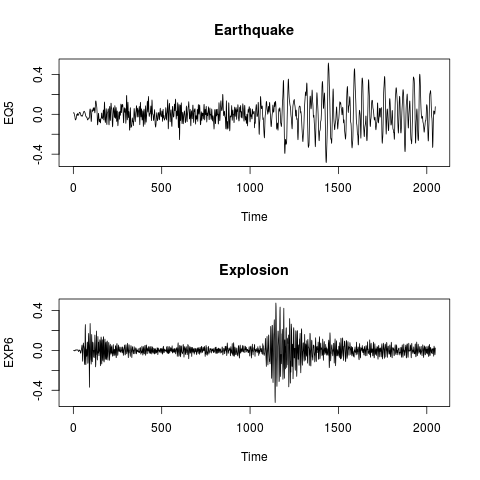

In [22]:
par(mfrow=c(2,1))
plot(EQ5, main="Earthquake")
plot(EXP6, main="Explosion")

# 1.3 Time Series Statistical Models

## Example 1.8 White Noise

* A simple kind of generated series might be a collection of uncorrelated random variables, w_t , with mean 0 and finite variance σ2_w . 
* The time series generated from uncorrelated variables is used as a model for noise in engineering applications, where it is called white noise
    - w_t ∼ wn(0, σ2_w )
* Independent and identically distributed (iid) random variables with mean 0 and variance σ2_w . 
    * this case by saying white independent noise, or by writing 
        - w_t ∼iid(0, σ2_w ). 
        - A particularly useful white noise series is Gaussian white noise,
        - w_t ∼ iid N(0, σ2_w ). 

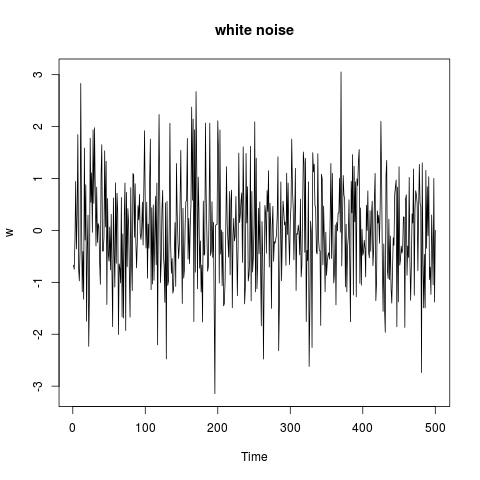

In [18]:
w = rnorm(500,0,1) # 500 N(0,1) variates
v = filter(w, sides=2, rep(1/3,3)) # moving average
#par(mfrow=c(2,1))
plot.ts(w, main="white noise")
#plot.ts(v, ylim=c(-3,3), main="moving average")

## Example 1.9 Moving Averages and Filtering

* We might replace the white noise series wt by a moving average that smooths the series. 
* For example, consider replacing wt in Example 1.8 by an average
of its current value and its immediate neighbors in the past and future. 
* That is, let

<img src='figures/eq1.1.png' />

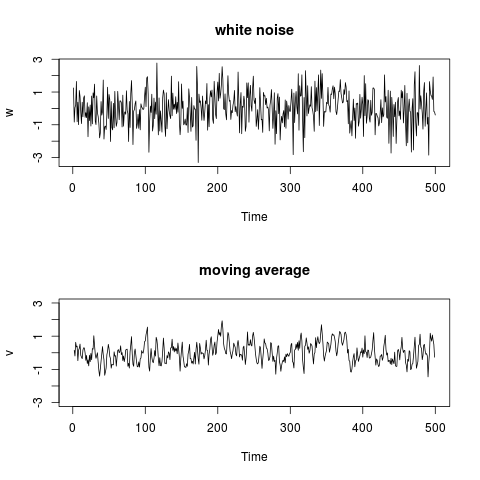

In [20]:
w = rnorm(500,0,1) # 500 N(0,1) variates
v = filter(w, sides=2, rep(1/3,3)) # moving average
par(mfrow=c(2,1))
plot.ts(w, main="white noise")
plot.ts(v, ylim=c(-3,3), main="moving average")

## Example 1.10 Autoregressions

* Suppose we consider the white noise series wt of Example 1.8 as input and
calculate the output using the second-order equation

<img src='figures/eq1.2.png' />

successively for t = 1, 2, . . . , 500.

* Equation (1.2) represents a regression or prediction of the current value xt of a time series as a function of the past two values of the series, and, hence, the term autoregression is suggested for this model. 
* A problem with startup values exists here because (1.2) also
depends on the initial conditions x0 and x−1 , but, for now, we assume that
we are given these values and generate the succeeding values by substituting
into (1.2). That is, given w1 , w2 , . . . , w500 , and x0 , x−1 , we start with x1 = x0 −.9x−1 +w1 , then recursively compute x2 = x1 −.9x0 +w2 , then x3 = x2 − .9x1 + w3 , and so on. 
* The autoregressive model above and its generalizations can be used as an underlying model for many observed series and will be studied in detail in Chapter 3.

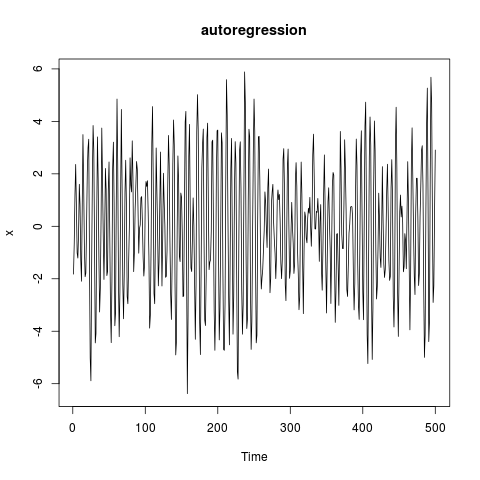

In [29]:
w = rnorm(550,0,1) # 50 extra to avoid startup problems
x = filter(w, filter=c(1,-.9), method="recursive")[-(1:50)]
plot.ts(x, main="autoregression")

## Example 1.11 Random Walk with Drift

A model for analyzing trend such as seen in the global temperature data in
Figure 1.2, is the random walk with drift model given by


<img src='figures/eq1.3.png' />

* for t = 1, 2, . . ., with initial condition x_0 = 0, 
* and where w_t is white noise.
* The constant δ is called the drift, 
* and when δ = 0, (1.3) is called simply a random walk. 
* The term random walk comes from the fact that, 
    - when δ = 0, the value of the time series at time t is the value of the series at time t − 1 plus a completely random movement determined by w_t . 
    - Note that we may rewrite (1.3) as a cumulative sum of white noise variates. That is,

<img src='figures/eq1.4.png' />

* or t = 1, 2, . . .; either use induction, or plug (1.4) into (1.3) to verify this
statement. 
* Figure 1.10 shows 200 observations generated from the model
with δ = 0 and .2, and with σ2_w = 1. 
* For comparison, we also superimposed the straight line .2t on the graph.


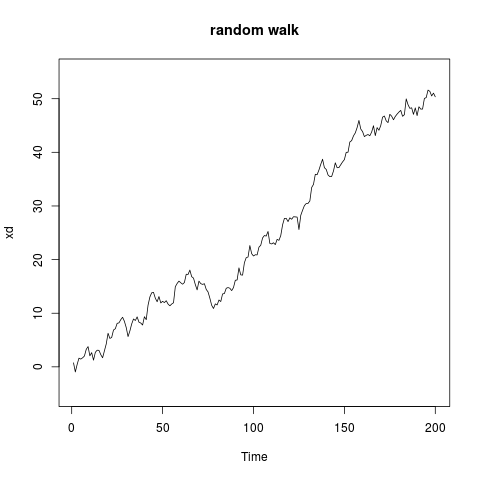

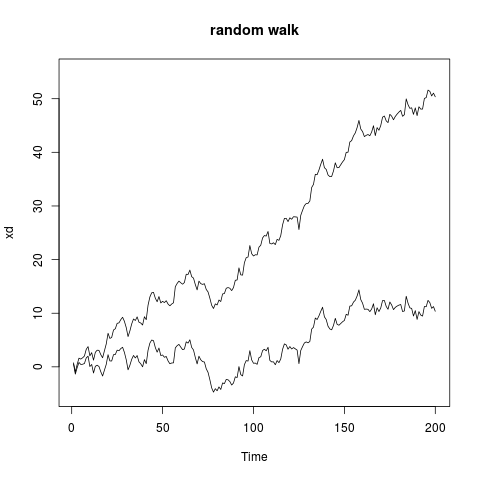

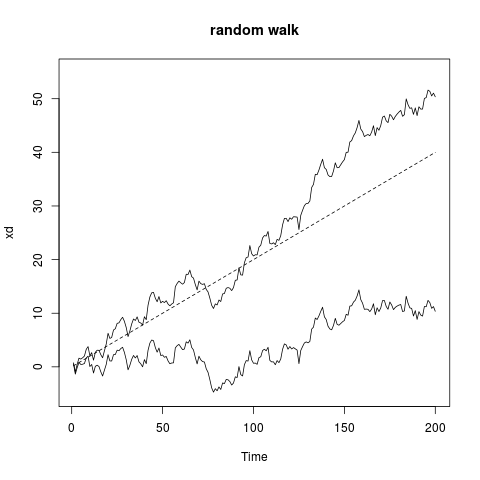

In [21]:
set.seed(154)
# so you can reproduce the results
w = rnorm(200,0,1); x = cumsum(w)
# two commands in one line
wd = w +.2;
xd = cumsum(wd)
plot.ts(xd, ylim=c(-5,55), main="random walk")
lines(x); lines(.2*(1:200), lty="dashed")

* Random walk, σw = 1, with drift δ = .2 (upper jagged line), 
* without drift, δ = 0 (lower jagged line), 
* and a straight line with slope .2 (dashed line).

## Example 1.12 Signal in Noise

* Many realistic models for generating time series assume an underlying signal
with some consistent periodic variation, contaminated by adding a random
noise. 
* For example, it is easy to detect the regular cycle fMRI series displayed
on the top of Figure 1.6. Consider the model


<img src='figures/eq1.5.png' />  

* for t = 1, 2, . . . , 500, where the first term is regarded as the signal, shown in the upper panel of Figure 1.11. 
* We note that a sinusoidal waveform can be written as

<img src='figures/eq1.6.png' />  

* where A is the amplitude, ω is the frequency of oscillation, and φ is a phase
shift. 
* In (1.5), A = 2, ω = 1/50 (one cycle every 50 time points), and φ = .6π.

* An additive noise term was taken to be white noise with σw = 1 (mid-
dle panel) and σw = 5 (bottom panel), drawn from a normal distribution.


* the degree to which the signal is obscured depends
on the amplitude of the signal and the size of σw . 
* The ratio of the amplitude of the signal to σw (or some function of the ratio) is sometimes called the signal-to-noise ratio (SNR); 
* the larger the SNR, the easier it is to detect the signal. 

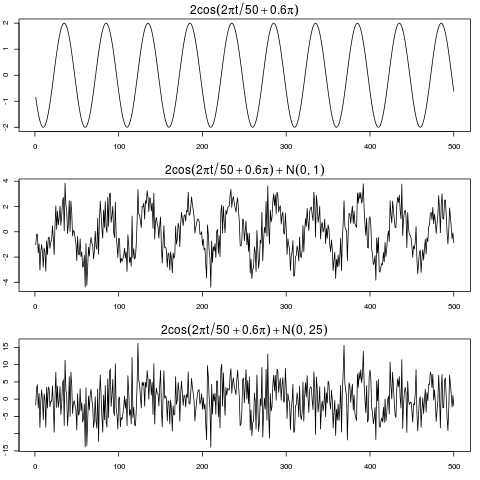

In [33]:
cs = 2*cos(2*pi*1:500/50 + .6*pi)
w = rnorm(500,0,1)
par(mfrow=c(3,1), mar=c(3,2,2,1), cex.main=1.5)
plot.ts(cs, main=expression(2*cos(2*pi*t/50+.6*pi)))
plot.ts(cs+w, main=expression(2*cos(2*pi*t/50+.6*pi) + N(0,1)))
plot.ts(cs+5*w, main=expression(2*cos(2*pi*t/50+.6*pi) + N(0,25)))

## 1.4 Measures of Dependence: Autocorrelation and Cross-Correlation

* A complete description of a time series, observed as a collection of n random variables at arbitrary integer time points t1 , t2 , . . . , tn , for any positive integer n, is provided by the joint distribution function, evaluated as the probability that the values of the series are jointly less than the n constants, c1 , c2 , . . . , cn ; i.e.,

<img src='figures/eq1.7.png' />  

* Although the joint distribution function describes the data completely, it
is an unwieldy tool for displaying and analyzing time series data. The dis-
tribution function (1.7) must be evaluated as a function of n arguments, so
any plotting of the corresponding multivariate density functions is virtually
impossible.


* The marginal distribution functions, when they exist, are often informative for examining the marginal behavior of a series.


* Another informative marginal descriptive measure is the mean function.

<img src='figures/def1.1.png' />   

## Example 1.13 Mean Function of a Moving Average Series

* If wt denotes a white noise series, then μ_wt = E(w_t ) = 0 for all t. The top
series in Figure 1.8 reflects this, as the series clearly fluctuates around a
mean value of zero.

* Smoothing the series as in Example 1.9 does not change the mean because we can write

<img src='figures/ex1.13.png' />  

#### Moving Average Series example

<img src='figures/eq1.1.png' />

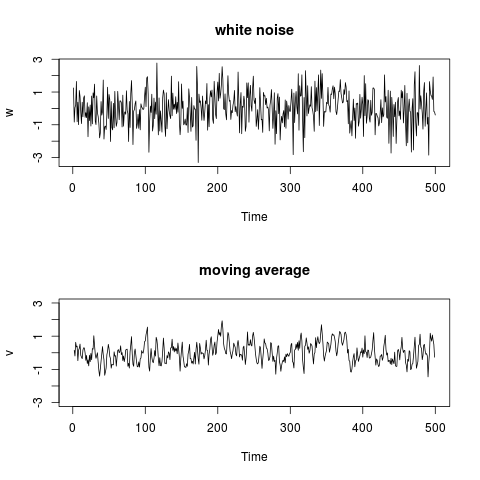

In [20]:
w = rnorm(500,0,1) # 500 N(0,1) variates
v = filter(w, sides=2, rep(1/3,3)) # moving average
par(mfrow=c(2,1))
plot.ts(w, main="white noise")
plot.ts(v, ylim=c(-3,3), main="moving average")

## Example 1.14 Mean Function of a Random Walk with Drift

<img src='figures/ex1.14.png' />  

<img src='figures/fig1.10.png' with=600 />

## Example 1.15 Mean Function of Signal Plus Noise

* A great many practical applications depend on assuming the observed data
have been generated by a fixed signal waveform superimposed on a zero-
mean noise process, leading to an additive signal model of the form (1.5). It
is clear, because the signal in (1.5) is a fixed function of time, we will have

<img src='figures/ex1.15.png' />  

and the mean function is just the cosine wave.

* The lack of independence between two adjacent values x_s and x_t can be
assessed numerically, as in classical statistics, using the notions of covariance
and correlation. Assuming the variance of xt is finite, we have the following
definition.

<img src='figures/def1.2.png' />     

<img src='figures/eq1.10.png' />  

In [ ]:
# Example 1.16 Autocovariance of White Noise

<img src='figures/eq1.11.png' />  

In [ ]:
# Example 1.17 Autocovariance of a Moving Average

<img src='figures/ex1.17.png' />  

<img src='figures/eq1.12.png' />  

In [ ]:
# Example 1.18 Autocovariance of a Random Walk

<img src='figures/ex1.18.png' />  

<img src='figures/def1.3.png' />     

In [ ]:
# 1.5 Stationary Time Series

In [ ]:
# Example 1.19 Stationarity of White Noise

<img src='figures/ex1.19.png' />  

In [ ]:
# Example 1.20 Trend Stationarity

<img src='figures/ex1.20.png' />    

In [ ]:
# Example 1.21 Stationarity of a Moving Average

<img src='figures/ex1.21.png' />    

<img src='figures/eq1.20.png' />  

<img src='figures/eq1.21.png' />

<img src='figures/ex1.21-2.png' />  

<img src='figures/def1.10.png' />  

<img src='figures/def1.11.png' />  

In [ ]:
# Example 1.22 Joint Stationarity

<img src='figures/ex1.22.png' />    

In [ ]:
# Example 1.23 Prediction Using Cross-Correlation

<img src='figures/ex1.23-1.png' />  

<img src='figures/ex1.23-2.png' />

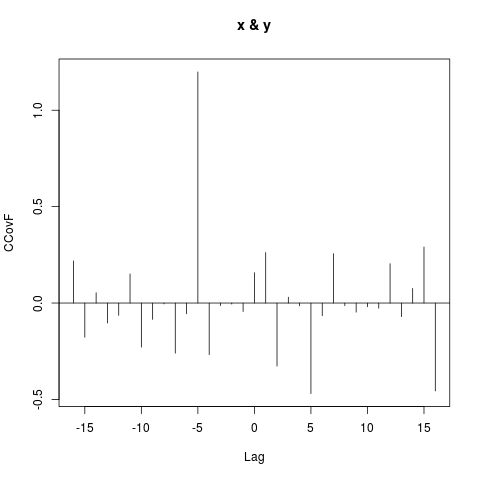

In [34]:
set.seed(90210)
x = rnorm(100)
y = lag(x,-5) + rnorm(100)
ccf(x,y, ylab='CCovF', type='covariance')

<img src='figures/def1.12.png' />  

<img src='figures/def1.13.png' />  

In [ ]:
# 1.6 Estimation of Correlation

<img src='figures/eq1.28.png' />  

<img src='figures/eq1.29.png' />  

<img src='figures/def1.14.png' />  

<img src='figures/def1.15.png' />    

<img src='figures/prop1.1.png' />

In [ ]:
# Example 1.24 A Simulated Time Series

<img src='figures/eq1.32.png' />  

<img src='figures/ex1.24.png' />

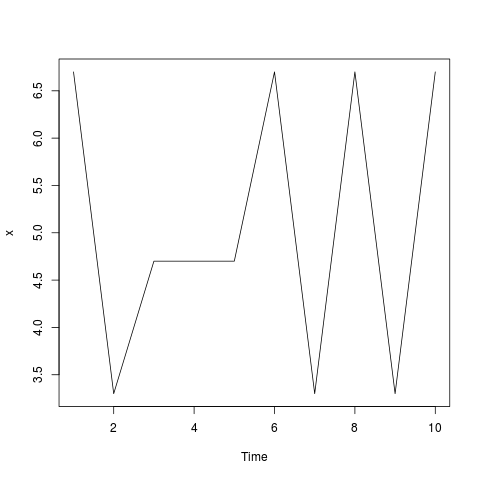

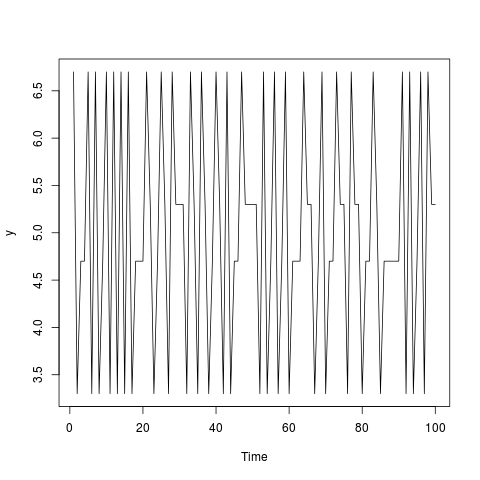


Autocorrelations of series ‘x’, by lag

     0      1      2      3      4 
 1.000 -0.688  0.425 -0.306 -0.007 

In [35]:
set.seed(101010)
x = 2*rbinom(11, 1, .5) - 1
# simulated sequence of coin tosses
y = 2*rbinom(101, 1, .5) - 1
x = 5 + filter(x, sides=1, filter=c(1,-.7))[-1]
y = 5 + filter(y, sides=1, filter=c(1,-.7))[-1]
plot.ts(x)
# not shown
plot.ts(y)
# not shown
acf(x, lag.max=4, plot=FALSE) # se = 1/sqrt(10) =.32

In [ ]:
# Example 1.25 ACF of a Speech Signal

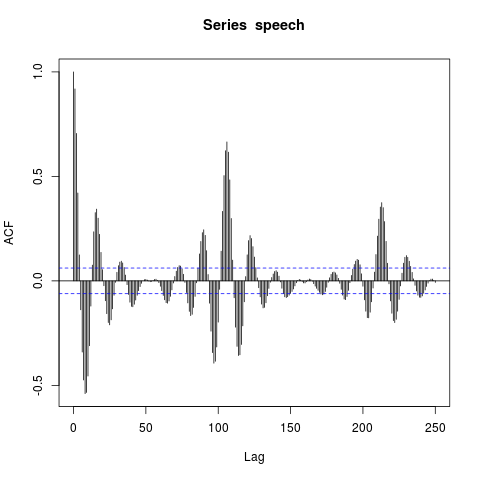

In [36]:
acf(speech, 250)

<img src='figures/prop1.2.png' />

In [ ]:
# Example 1.26 SOI and Recruitment Correlation Analysis

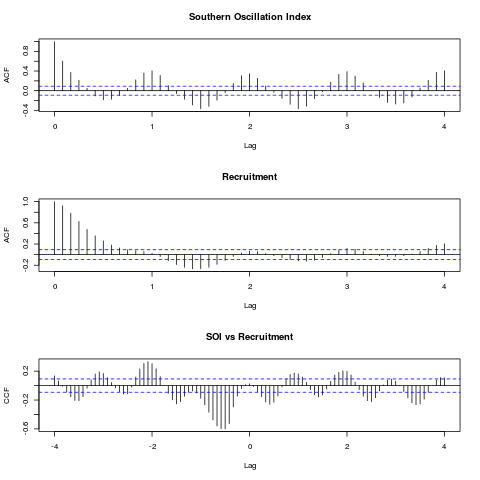

In [37]:
par(mfrow=c(3,1))
acf(soi, 48, main="Southern Oscillation Index")
acf(rec, 48, main="Recruitment")
ccf(soi, rec, 48, main="SOI vs Recruitment", ylab="CCF")

In [ ]:
<img src='figures/def1.5.png' />  

In [ ]:
<img src='figures/eq1.4.png' />  

In [ ]:
<img src='figures/def1.6.png' />  

In [ ]:
<img src='figures/fig1.12.png' />

In [ ]:
<img src='figures/def1.7.png' />  

In [ ]:
<img src='figures/fig1.13.png' />

In [ ]:
<img src='figures/def1.33-1.png' />  

In [ ]:
<img src='figures/def1.8.png' />  

In [ ]:
<img src='figures/eq1.13.png' />  

<img src='figures/def1.4.png' />     

<img src='figures/def1.9.png' />  

<img src='figures/def1.33-2.png' />  

<img src='figures/eq1.17.png' />  

<img src='figures/eq1.3.png' />   

<img src='figures/eq1.8.png' />  

<img src='figures/eq1.1.png' />   

<img src='figures/eq1.2.png' />   

<img src='figures/eq1.9.png' />  